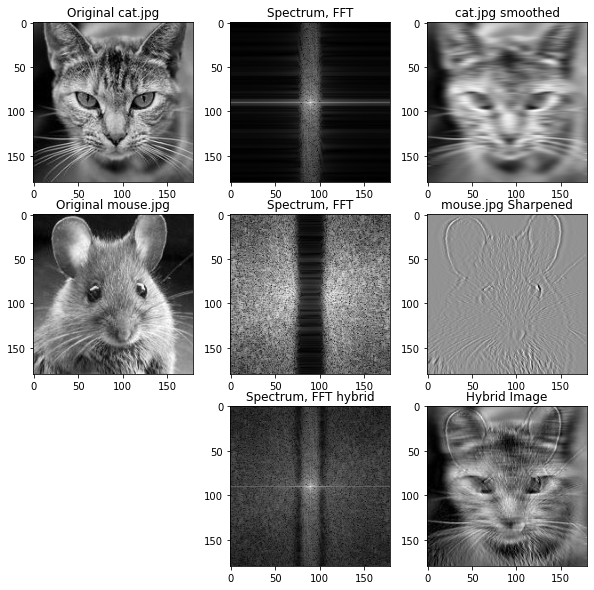

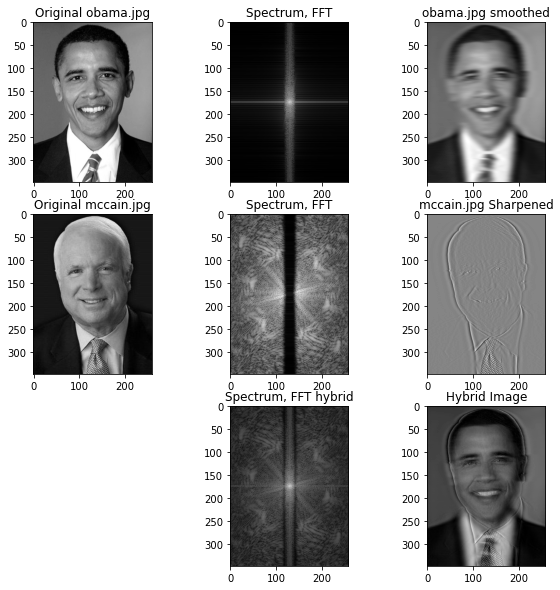

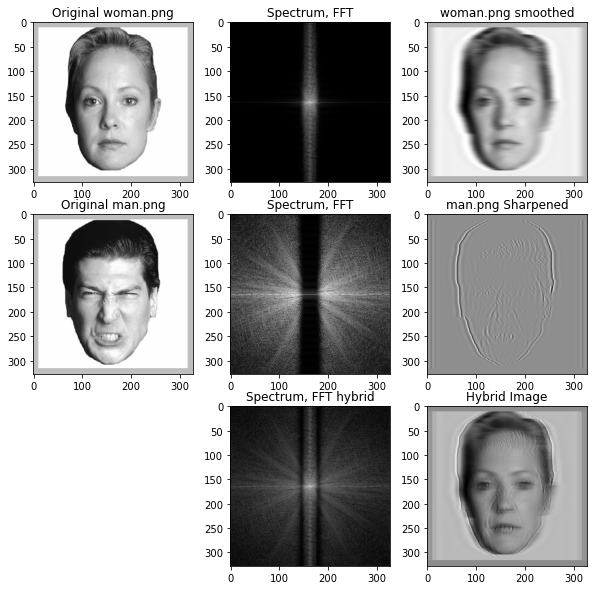

In [1]:
# AmirAndakhs
# 22839936
# Lab2 Week3

import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from numpy.fft import fft2,fftshift,ifft2

import numpy as np
from scipy import signal
# from scipy.fft import fft, ifft, fftshift

def low_pass_filter(sample_signal, cutoff_frequency, sample_rate):
    nyquist_frequency = sample_rate / 2
    normalized_cutoff_frequency = cutoff_frequency / nyquist_frequency
    b, a = signal.butter(4,  normalized_cutoff_frequency, 'low')
    filtered_signal = signal.filtfilt(b, a, sample_signal)
    return filtered_signal



def highpass(sample_signal, cutoff_freq, fs):
    nyquist = 0.5 * fs 
    order = 4 
    b, a = signal.butter(order, cutoff_freq / nyquist, 'high') 
    filtered_signal = signal.filtfilt(b, a, sample_signal) 
    return filtered_signal

def test(image1 = "mouse.jpg", image2= "cat.jpg", c_low=0.035,c_hig = 0.1, sample_rate_low = 1, sample_rate_high= 1):
    """
    AmirAndakhs
    22839936
    Lab2 Week3
    """
    # Reading images
    mouse_image = imread(image1)
    cat_image = imread(image2)

    # turning into gray
    mouse_image_grey = rgb2gray(mouse_image)
    cat_image_grey = rgb2gray(cat_image)

    # applying filter to images

    lowpassresult = low_pass_filter(cat_image_grey,c_low,sample_rate_low)
    highpassresult = highpass(mouse_image_grey,c_hig,sample_rate_high)

    # Applying fft
    lowpassresult_freq = fft2(lowpassresult)
    highpassresult_freq = fft2(highpassresult)

    # shifting to focus the image 
    lowpassresult_freq_shifted= fftshift(lowpassresult_freq)
    highpassresult_freq_shifted = fftshift(highpassresult_freq)

    # Creating hybrid image     
    hybrid_image = lowpassresult_freq + highpassresult_freq
    hybrid_image_inverted = ifft2(hybrid_image)
    hybrid_freq_shifted= fftshift(hybrid_image)
    
    
    plt.figure(figsize=(10,10), constrained_layout=False)
    plt.subplot(331), plt.imshow(cat_image_grey, "gray"), plt.title(f"Original {image2}")
    plt.subplot(332), plt.imshow(np.log(1+np.abs(lowpassresult_freq_shifted)), "gray"), plt.title("Spectrum, FFT")
    plt.subplot(333), plt.imshow(lowpassresult, "gray"), plt.title(f"{image2} smoothed")
    plt.subplot(334), plt.imshow(mouse_image_grey, "gray"), plt.title(f"Original {image1}")
    plt.subplot(335), plt.imshow(np.log(1+np.abs(highpassresult_freq_shifted)), "gray"), plt.title("Spectrum, FFT")
    plt.subplot(336), plt.imshow(highpassresult, "gray"), plt.title(f"{image1} Sharpened")
    plt.subplot(338), plt.imshow(np.log(1+np.abs(hybrid_freq_shifted)), "gray"), plt.title("Spectrum, FFT hybrid")
    plt.subplot(339), plt.imshow(np.abs(hybrid_image_inverted), cmap ="gray"), plt.title("Hybrid Image")

    plt.show()
    
# test1 
test(image1 = "mouse.jpg", image2= "cat.jpg", c_low=0.05,c_hig = 0.1, sample_rate_low = 1, sample_rate_high= 1)
# test2
test(image1 = "mccain.jpg", image2= "obama.jpg", c_low=0.035,c_hig = 0.06, sample_rate_low = 1, sample_rate_high= 1)
# test3
test(image1 = "man.png", image2= "woman.png", c_low=0.035,c_hig = 0.08, sample_rate_low = 1, sample_rate_high= 1)